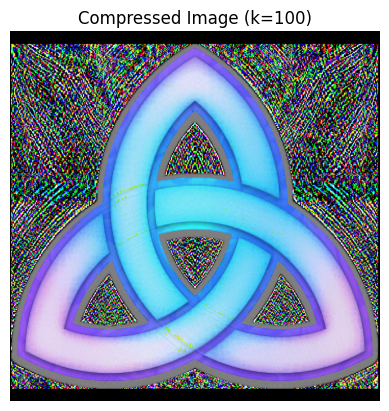

Original Image Memory: 2929.69 KB
Compressed Image Memory: 4689.84 KB
Compressed Image takes up 160.08% of the original image memory.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image

def compress_image(img_path, k):
    # Load the image and convert to RGB
    img = Image.open(img_path).convert('RGB')
    img_array = np.array(img)
    
    # Calculate the memory size of the original image
    original_memory = img_array.nbytes
    
    # Split the image into RGB channels
    r = img_array[:, :, 0]
    g = img_array[:, :, 1]
    b = img_array[:, :, 2]
    
    # Apply SVD to each channel
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)
    
    # Reconstruct the image with reduced singular values
    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))
    
    # Combine the channels back into an image
    compressed_image = np.dstack((rr, rg, rb)).astype(np.uint8)
    
    # Calculate the memory size of the compressed image based on SVD components
    compressed_memory = (
        ur[:, :k].nbytes + sr[:k].nbytes + vr[:k, :].nbytes +  # Red channel
        ug[:, :k].nbytes + sg[:k].nbytes + vg[:k, :].nbytes +  # Green channel
        ub[:, :k].nbytes + sb[:k].nbytes + vb[:k, :].nbytes    # Blue channel
    )
    
    # Calculate the percentage of memory used by the compressed image
    memory_percentage = (compressed_memory / original_memory) * 100
    
    # Display the compressed image
    plt.imshow(compressed_image)
    plt.title(f"Compressed Image (k={k})")
    plt.axis('off')
    plt.show()
    
    # Print memory usage information
    print(f"Original Image Memory: {original_memory / 1024:.2f} KB")
    print(f"Compressed Image Memory: {compressed_memory / 1024:.2f} KB")
    print(f"Compressed Image takes up {memory_percentage:.2f}% of the original image memory.")

# Example usage
compress_image('/workspaces/steve-brunton-book/images/favicon.png', 100)